# To study the temperature dependence of resistance of a given semiconductor

In [1]:
import numpy as np #https://github.com/numpy/numpy 
import matplotlib.pyplot as plt #https://github.com/matplotlib/matplotlib
import scipy.stats as st #https://github.com/scipy/scipy
import pandas as pd #https://github.com/pandas-dev/pandas
from PIL import Image
from IPython.display import display

![img](EXP.png)

In [2]:
img = Image.open('EXP.png')

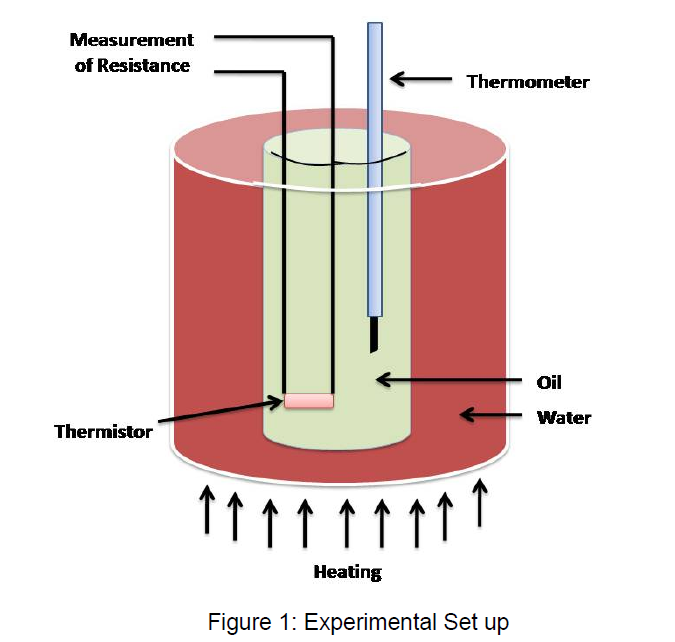

In [3]:
display(img)

In [4]:
df = pd.read_excel('SEMICONDUCTOR_EXP.xlsx')
df

,T_C,T_K,R_kOhm,R_Ohm,1_T,Y_LN1_R,X^2,xy
0,30,303,8.440,8440,0.003300,-2.132982,0.000011,-0.007040
1,32,305,8.710,8710,0.003279,-2.164472,0.000011,-0.007097
2,34,307,8.730,8730,0.003257,-2.166765,0.000011,-0.007058
3,36,309,7.900,7900,0.003236,-2.066863,0.000010,-0.006689
4,38,311,6.740,6740,0.003215,-1.908060,0.000010,-0.006135
5,40,313,6.180,6180,0.003195,-1.821318,0.000010,-0.005819
6,42,315,5.630,5630,0.003175,-1.728109,0.000010,-0.005486
7,44,317,5.250,5250,0.003155,-1.658228,0.000010,-0.005231
8,46,319,4.850,4850,0.003135,-1.578979,0.000010,-0.004950
9,48,321,4.520,4520,0.003115,-1.508512,0.000010,-0.004699


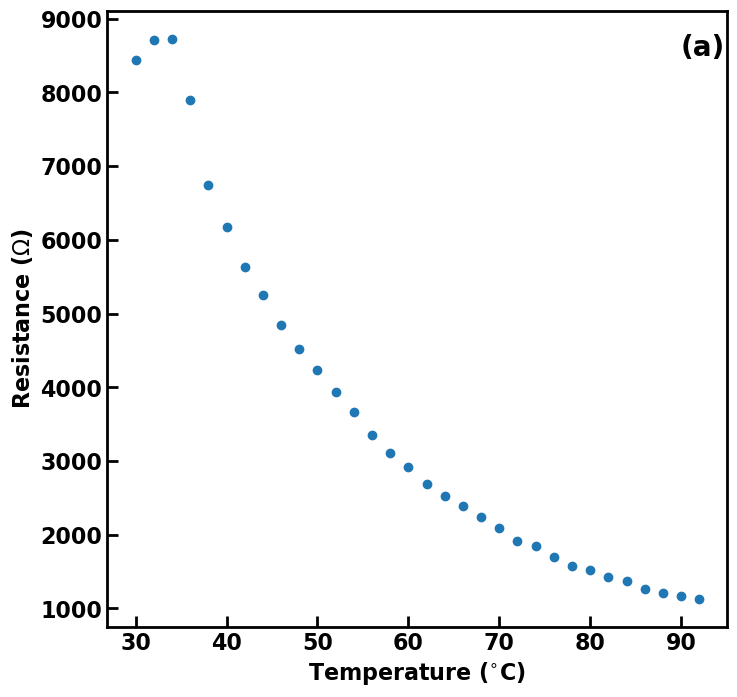

In [6]:
from scipy import stats
T= df['T_C']
R= df['R_Ohm']
plt.figure(figsize=(8,8))

plt.scatter(T,R)
plt.gca().spines[['top', 'bottom', 'left', 'right']].set_linewidth(2)
plt.xlabel('Temperature ($^{\circ}$C)', fontsize = 16, fontweight='bold')
plt.ylabel(r'Resistance ($\Omega$)'  , fontsize = 16, fontweight='bold')
plt.text(90, 8500, r'(a)', fontsize = 20, fontweight='bold')
plt.xticks (fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tick_params(axis='x',length=8,width=2)
plt.tick_params(axis='y',length=8,width=2)
plt.tick_params(direction='in')
# ax.set_yticks([4, 4.95,5.75])
# ax.set_xticks([21.0, 22.0, 23.0])
plt.savefig('Fig6a.eps', bbox_inches='tight',dpi = 600)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-3869.573270156156
10.539063823394157
-0.9986275072454265
5.419371797687684e-40
37.05270194212268


<Figure size 800x800 with 0 Axes>

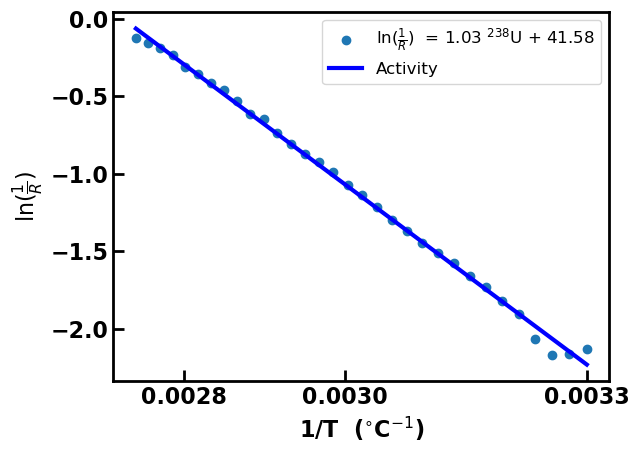

In [27]:
from scipy import stats
TR= df['1_T']
LNR= df['Y_LN1_R']
plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
slope, intercept, r, p, std_err = stats.linregress(TR, LNR)
def myfunc(TR):
  return slope * TR + intercept
mymodel = list(map(myfunc,TR))
plt.scatter(TR,LNR)
plt.plot(TR, mymodel, color = 'b', linewidth = 3)
plt.xlabel('1/T  ($^{\circ}$C$^{-1}$)', fontsize = 16, fontweight='bold')
plt.ylabel(r'$\ln (\frac{1}{R})$', fontsize = 16, fontweight='bold')
# plt.text(80, 160, r'(a)', fontsize = 20, fontweight='bold')
# plt.text(60, 60, r'r = 0.79', fontsize = 20, fontweight='bold')
plt.legend([r"$\ln (\frac{1}{R})$  = m $\frac{1}{T} + ","Activity"],loc="upper right",prop={"size":12})
plt.xticks (fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tick_params(axis='x',length=8,width=2)
plt.tick_params(axis='y',length=8,width=2)
plt.tick_params(direction='in')
ax.set_xticks([0.0028, 0.0030,0.0033])
# ax.set_xticks([21.0, 22.0, 23.0])

for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the desired border thickness
plt.savefig('Fig6b.eps', bbox_inches='tight',dpi = 600)
print(slope),
print(intercept)
print(r)
print(p)
print(std_err)
plt.show()